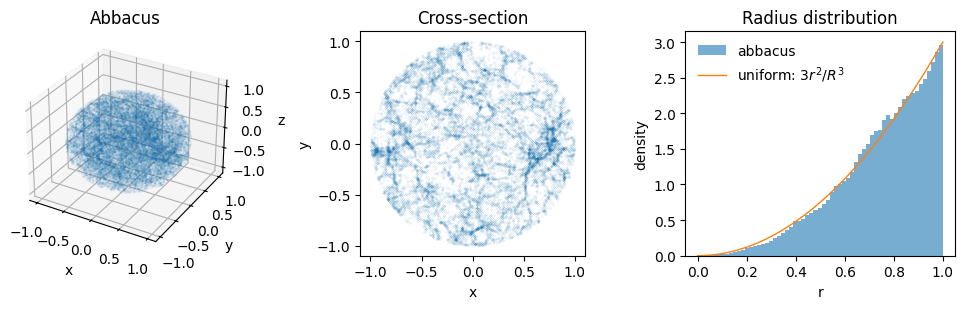

In [ ]:
import torch
from pathlib import Path

from utils import BASE_DIR, PROJECT
from data.datasets import AbbacusData, Uniform3D
from utils.plotting import plot_lss_slices, plot_lss_results
from utils.data import Landy_Szalay

exp_dir = Path(BASE_DIR, PROJECT, exp_id)
traj = torch.load(exp_dir / "trajectories.pt")
abbacus = AbbacusData(datafile='/pscratch/sd/d/dfarough/LSS_data/halo_positions.npy')
truth = abbacus.sample()


## Results

In [ ]:
from pathlib import Path

from data.datasets import AbbacusData
from utils.experiments import Configs, RunExperiment
from generative_models.flow_matching import ConditionalFlowMatching

#=====================================================================
exp_path = '/home/df630/LSSFlow/runs/a5ee61bc36d3419384e4dc3346a21fb6'
best_ckpt_path = Path(exp_path, 'checkpoints', 'best.ckpt')
#=====================================================================


config = Configs(load_config=Path(exp_path, 'config.yaml'))
model = ConditionalFlowMatching.load_from_checkpoint(best_ckpt_path,
                                                     config=config,
                                                     map_location="cpu"
                                                     )


In [7]:
model

ConditionalFlowMatching(
  (model): ModuleDict(
    (fourier_feats): LearnableFourierEmbedding(
      (Wr): ParameterList(
          (0): Parameter containing: [torch.float32 of size 64x1]
          (1): Parameter containing: [torch.float32 of size 64x3]
      )
    )
    (wf): Sequential(
      (0): Linear(in_features=256, out_features=256, bias=True)
      (1): GELU(approximate='none')
      (2): Linear(in_features=256, out_features=256, bias=True)
    )
    (wx): Sequential(
      (0): Linear(in_features=3, out_features=256, bias=True)
      (1): GELU(approximate='none')
      (2): Linear(in_features=256, out_features=256, bias=True)
    )
    (resnet): ResNet(
      (input_proj): Linear(in_features=512, out_features=512, bias=True)
      (blocks): Sequential(
        (0): ResidualBlock(
          (lin1): Linear(in_features=512, out_features=512, bias=True)
          (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (lin2): Linear(in_features=512, out_features

In [9]:
import torch

x = torch.randn(10, 3)
t = torch.rand(10)

model(x, t)

tensor([[1.7814],
        [0.3509],
        [0.4009],
        [0.2948],
        [0.6265],
        [1.1735],
        [0.3330],
        [0.3505],
        [0.5893],
        [0.3148]], grad_fn=<AddmmBackward0>)